# Asteroid Hazard Classification - Submission Machine Learning Terapan
Nama : Made Pranajaya Dibyacita

Dicoding Profile: https://www.dicoding.com/users/mdprana/academies

## Project Overview
Asteroid adalah benda langit berbatu yang mengorbit Matahari dan memiliki
ukuran yang lebih kecil daripada planet. Ribuan asteroid telah diidentifikasi dan dikatalogkan oleh para astronom. Beberapa di antaranya dikategorikan sebagai Potentially Hazardous Asteroids (PHAs) atau asteroid yang berpotensi berbahaya karena orbitnya yang dekat dengan orbit Bumi dan ukurannya yang cukup besar untuk menyebabkan kerusakan signifikan jika terjadi tumbukan.

Memprediksi apakah sebuah asteroid berpotensi berbahaya atau tidak adalah masalah penting dalam astronomi dan perlindungan planet. NASA dan badan antariksa lainnya secara aktif melacak dan mengklasifikasikan asteroid untuk mengidentifikasi potensi ancaman. Dengan memanfaatkan machine learning, kita dapat mengembangkan model yang memprediksi status bahaya asteroid berdasarkan karakteristik fisik dan orbitalnya.

Proyek ini bertujuan untuk mengembangkan model machine learning yang dapat mengklasifikasikan asteroid sebagai berbahaya atau tidak berbahaya berdasarkan parameter-parameter seperti diameter, parameter orbital (eksentrisitas, sumbu semi-mayor, jarak perihelion), dan parameter fisik lainnya.


**Referensi:**
- [NASA Center for Near Earth Object Studies](https://cneos.jpl.nasa.gov/)
- [Minor Planet Center](https://www.minorplanetcenter.net/)

## Business Understanding

### Problem Statements

1. Bagaimana cara mengidentifikasi asteroid yang berpotensi berbahaya bagi Bumi dengan memanfaatkan data parameter fisik dan orbital asteroid?
2. Fitur apa saja yang paling berpengaruh dalam menentukan apakah sebuah asteroid berpotensi berbahaya atau tidak?
3. Seberapa akurat model machine learning dapat memprediksi status bahaya sebuah asteroid?

### Goals

1. Mengembangkan model machine learning yang dapat mengklasifikasikan asteroid sebagai berbahaya atau tidak berbahaya dengan akurasi tinggi.
2. Mengidentifikasi fitur-fitur yang paling signifikan dalam menentukan status bahaya asteroid.
3. Memberikan alat prediksi yang dapat digunakan untuk mengevaluasi asteroid baru yang ditemukan.

### Solution approach

Untuk menyelesaikan masalah klasifikasi ini, saya akan menggunakan beberapa algoritma machine learning dan membandingkan performanya:

1. **Logistic Regression**: Model dasar yang mudah diinterpretasi untuk klasifikasi biner.
2. **Random Forest Classifier**: Algoritma ensemble yang dapat menangani data non-linear dan memberikan informasi tentang feature importance.
3. **XGBoost**: Algoritma gradient boosting yang sering memberikan performa tinggi untuk masalah klasifikasi.

Pendekatan ini akan memungkinkan kita untuk membandingkan berbagai model dan memilih yang terbaik berdasarkan metrik evaluasi seperti akurasi, presisi, recall, dan F1-score.

## Data Understanding

Data yang digunakan pada proyek machine learning ini adalah **Asteroid Dataset (2023)** yang didapat dari situs Kaggle. Dataset ini berisi informasi tentang asteroid yang telah diidentifikasi, termasuk parameter fisik dan orbital mereka.

Link dataset: [Asteroid Dataset](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset)

Pertama, mari kita instal dan import library yang dibutuhkan, lalu unduh dataset dari Kaggle.

In [1]:
# Install kaggle
!pip install kaggle

In [2]:
# Upload kaggle.json jika belum ada
from google.colab import files
import os

# Cek apakah file kaggle.json sudah ada
if not os.path.exists('/root/.kaggle'):
    os.makedirs('/root/.kaggle')

# Jika kaggle.json belum ada, upload file
if not os.path.exists('/root/.kaggle/kaggle.json'):
    print("Please upload your kaggle.json file")
    uploaded = files.upload()

    # Move the uploaded file to the correct location
    with open('/root/.kaggle/kaggle.json', 'w') as f:
        f.write(open(list(uploaded.keys())[0]).read())

    # Set the correct permissions
    !chmod 600 /root/.kaggle/kaggle.json

Please upload your kaggle.json file


Saving kaggle.json to kaggle.json


In [3]:
# Download dataset
!kaggle datasets download -d sakhawat18/asteroid-dataset
!unzip asteroid-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset
License(s): ODbL-1.0
Archive:  asteroid-dataset.zip
  inflating: dataset.csv             


### Load dan Eksplorasi Dataset

Mari kita load dataset asteroid dan melihat struktur datanya.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import RandomizedSearchCV

In [5]:
# Load dataset
df = pd.read_csv('dataset.csv')

# Tampilkan beberapa baris pertama
print("Sampel data asteroid:")
df.head()

<ipython-input-5-f47b3f0b6c1e>:2: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset.csv')


Sampel data asteroid:


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


#### Informasi Dataset

In [6]:
# Melihat informasi dataset
print("\nInformasi Dataset:")
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  obj

In [7]:
# Statistik deskriptif
print("\nStatistik Deskriptif:")
df.describe()


Statistik Deskriptif:


,spkid,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,e,a,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,9.585240e+05,952261.000000,136209.000000,135103.000000,136081.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,3.810114e+06,16.906411,5.506429,0.130627,0.479184,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,6.831541e+06,1.790405,9.425164,0.110323,0.782895,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,2.000001e+06,-1.100000,0.002500,0.001000,0.000500,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,2.239632e+06,16.100000,2.780000,0.053000,0.180000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,2.479262e+06,16.900000,3.972000,0.079000,0.332000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,3.752518e+06,17.714000,5.765000,0.190000,0.620000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,5.401723e+07,33.200000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


#### Cek Missing Values

In [8]:
# Memeriksa missing values
print("\nJumlah missing values per kolom:")
df.isnull().sum()


Jumlah missing values per kolom:


,0
id,0
spkid,0
full_name,0
pdes,0
name,936460
prefix,958506
neo,4
pha,19921
H,6263
diameter,822315


#### Distribusi Target: Potentially Hazardous Asteroid (PHA)

In [9]:
# Melihat distribusi kelas target (pha - potentially hazardous asteroid)
print("\nDistribusi Hazardous vs Non-Hazardous Asteroids:")
pha_count = df['pha'].value_counts()
print(pha_count)


Distribusi Hazardous vs Non-Hazardous Asteroids:
pha
N    936537
Y      2066
Name: count, dtype: int64


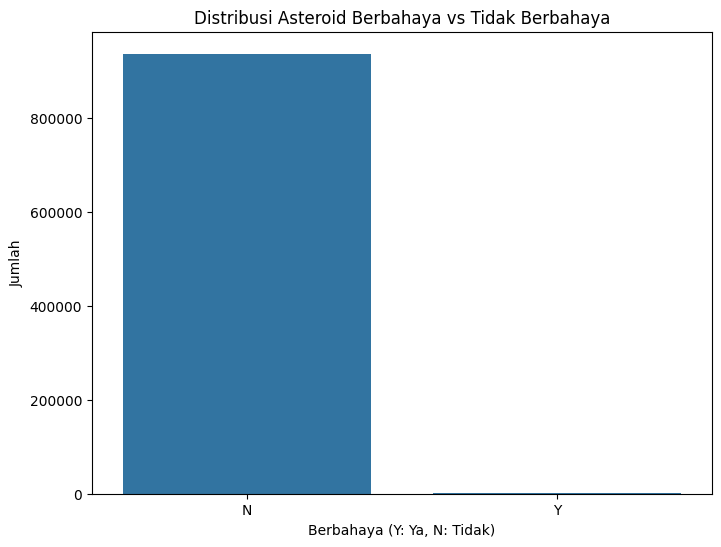

In [10]:
# Visualisasi distribusi target
plt.figure(figsize=(8, 6))
sns.countplot(x='pha', data=df)
plt.title('Distribusi Asteroid Berbahaya vs Tidak Berbahaya')
plt.xlabel('Berbahaya (Y: Ya, N: Tidak)')
plt.ylabel('Jumlah')
plt.show()

Dari visualisasi di atas, terlihat bahwa kelas target sangat tidak seimbang. Asteroid yang diklasifikasikan sebagai berbahaya (Y) jauh lebih sedikit dibandingkan dengan yang tidak berbahaya (N). Kita perlu menangani ketidakseimbangan kelas ini pada tahap preprocessing.

#### Eksplorasi Fitur Numerik

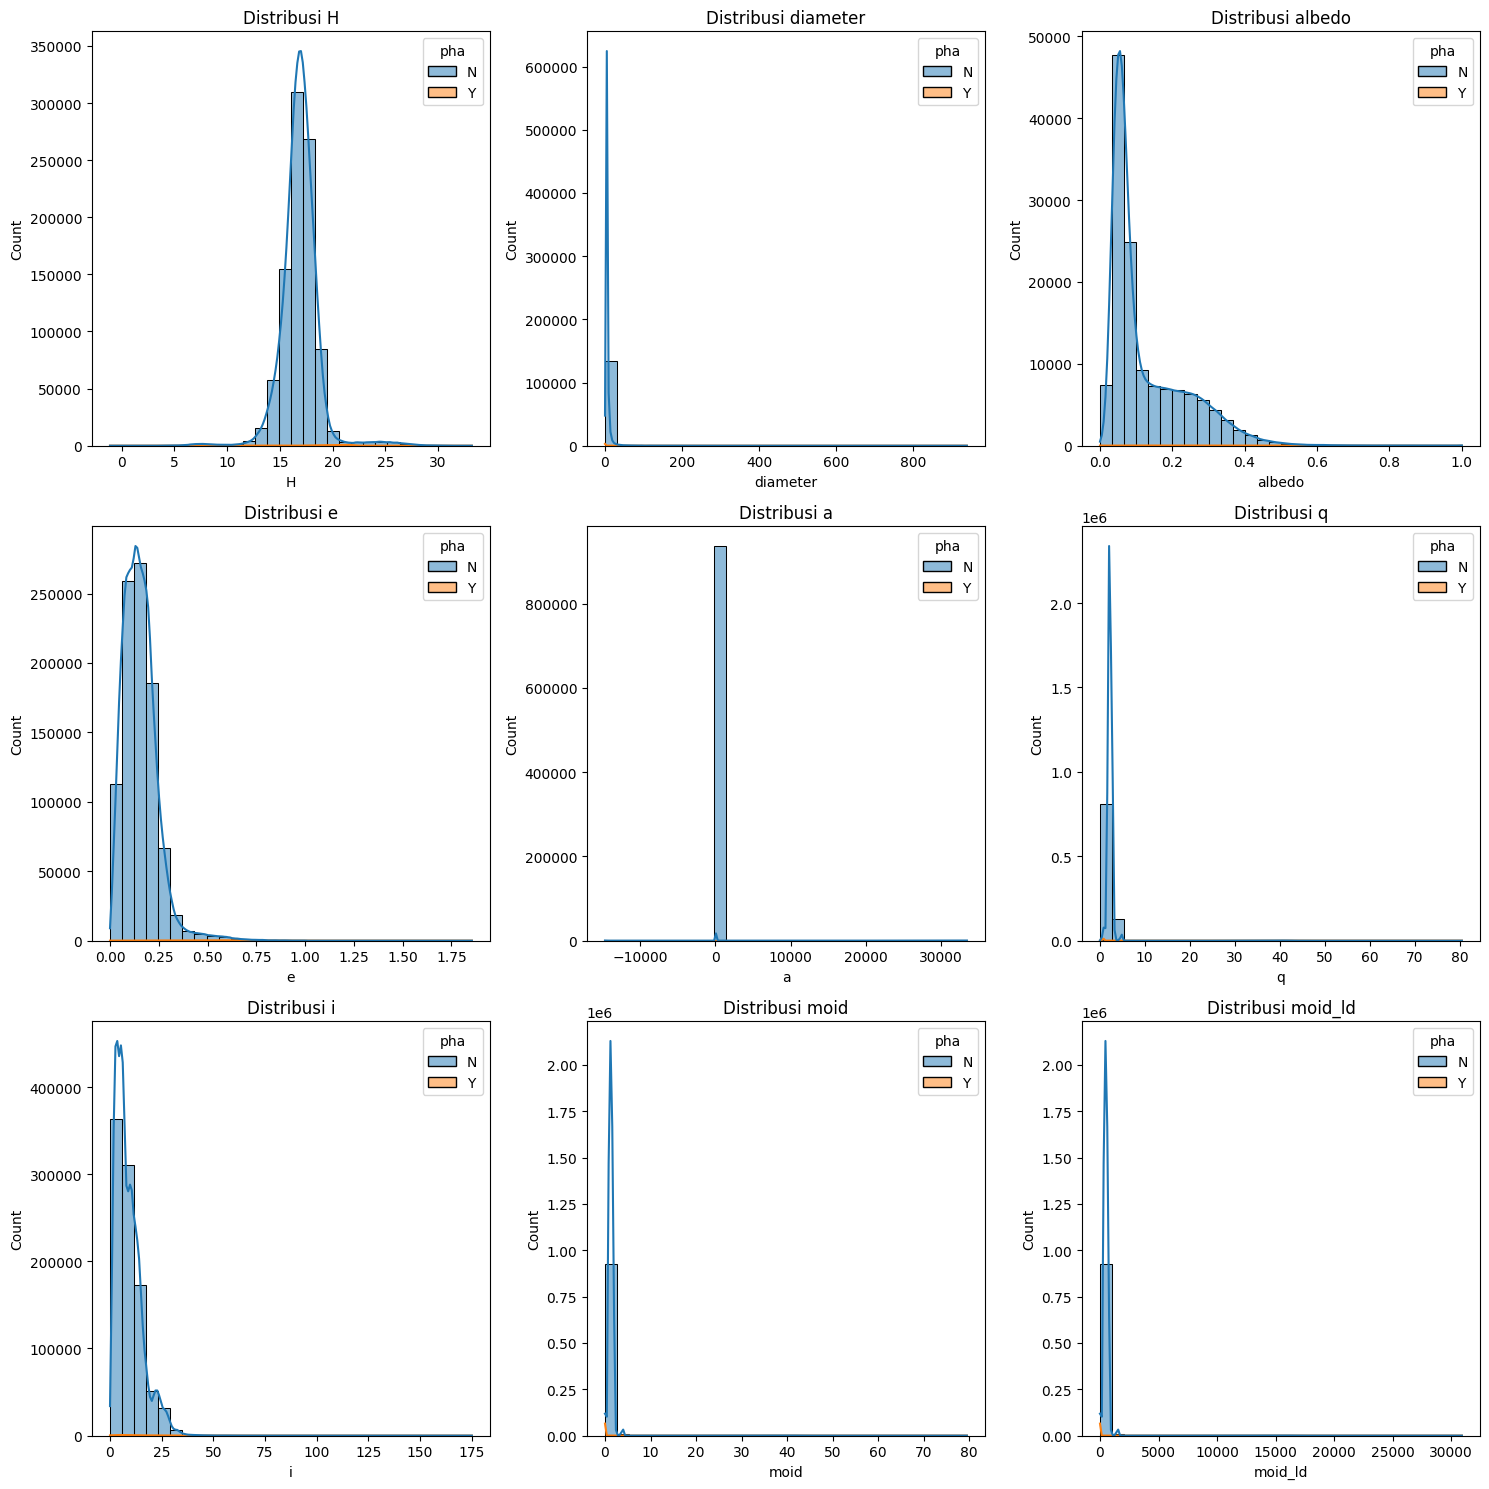

In [11]:
# Memilih fitur numerik yang relevan untuk analisis
numeric_features = ['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'moid', 'moid_ld']

# Histogram untuk fitur numerik
plt.figure(figsize=(15, 15))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=df, x=feature, hue='pha', kde=True, bins=30)
    plt.title(f'Distribusi {feature}')
plt.tight_layout()
plt.show()

Mari kita lihat deskripsi dari beberapa fitur penting:

- **H**: Magnitude absolut (makin kecil nilainya, makin besar asteroidnya)
- **diameter**: Diameter asteroid dalam kilometer
- **albedo**: Reflektivitas permukaan asteroid
- **e**: Eksentrisitas orbit (0 = melingkar, mendekati 1 = sangat lonjong)
- **a**: Sumbu semi-mayor orbit dalam satuan AU (Astronomical Unit)
- **q**: Jarak perihelion (titik terdekat dengan Matahari) dalam AU
- **i**: Inklinasi orbit dalam derajat
- **moid**: Minimum Orbit Intersection Distance dengan Bumi dalam AU
- **moid_ld**: MOID dalam satuan jarak lunar (LD) dari Bumi

#### Korelasi antar Fitur

In [12]:
# Mengisi missing values dengan median terlebih dahulu untuk perhitungan korelasi
df_numeric = df[numeric_features + ['pha']].copy()

# Konversi pha dari Y/N ke numerik (1/0) terlebih dahulu
df_numeric['pha'] = df_numeric['pha'].map({'Y': 1, 'N': 0})

# Sekarang isi nilai yang hilang pada kolom numerik lainnya
for col in numeric_features:  # Hanya isi kolom numerik, bukan 'pha'
    if df_numeric[col].isnull().sum() > 0:
        df_numeric[col] = df_numeric[col].fillna(df_numeric[col].median())

In [13]:
# Hitung korelasi antar fitur
correlation = df_numeric.corr()

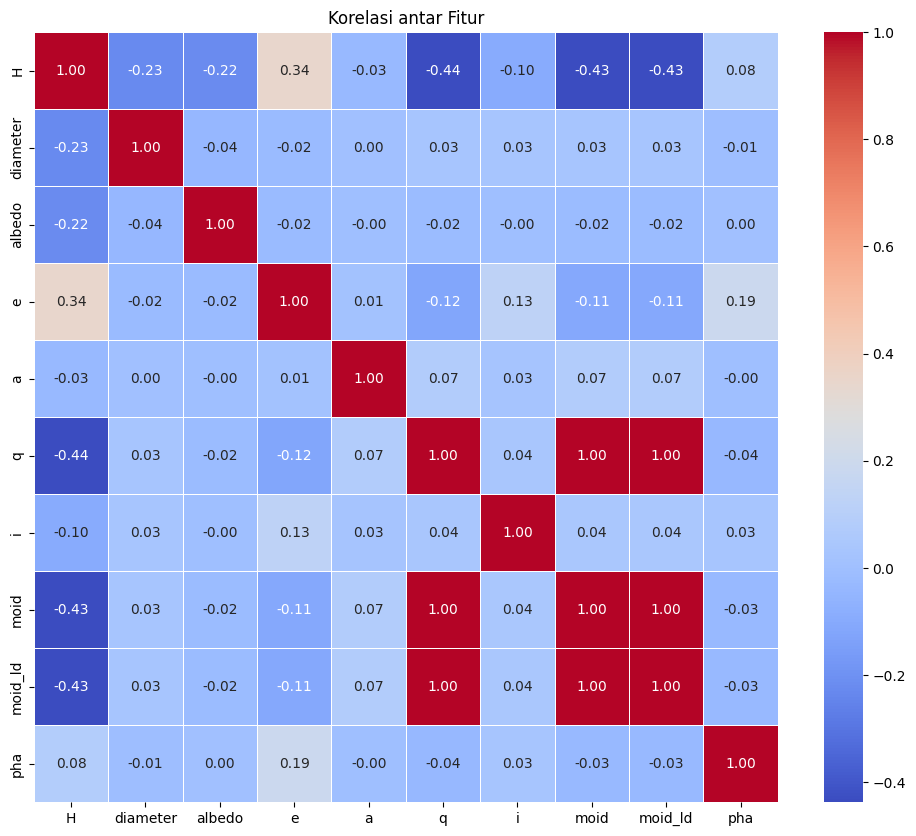

In [14]:
# Visualisasi korelasi dengan heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Korelasi antar Fitur')
plt.show()

#### Korelasi Fitur dengan Target

In [15]:
# Korelasi antara fitur dan target (pha)
correlation_with_target = correlation['pha'].sort_values(ascending=False)
print("\nKorelasi Fitur dengan Target (PHA):")
print(correlation_with_target)


Korelasi Fitur dengan Target (PHA):
pha         1.000000
e           0.190488
H           0.083200
i           0.033703
albedo      0.003211
a          -0.001327
diameter   -0.007122
moid_ld    -0.030303
moid       -0.030303
q          -0.035622
Name: pha, dtype: float64


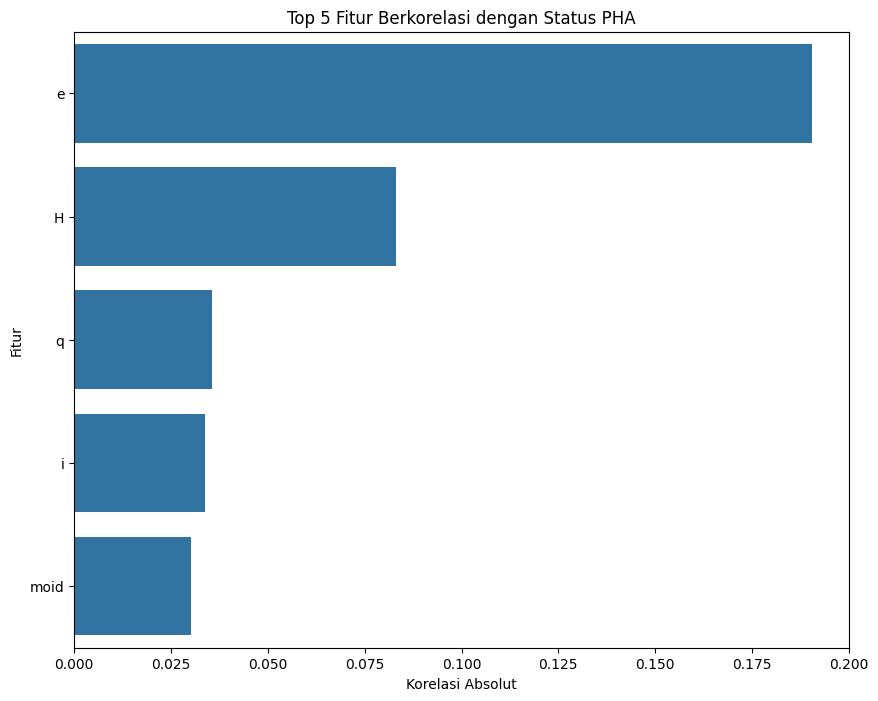

In [16]:
# Visualisasi top fitur berdasarkan korelasi dengan target
plt.figure(figsize=(10, 8))
correlation_with_target = correlation_with_target.drop('pha')  # drop target itu sendiri
top_corr = correlation_with_target.abs().sort_values(ascending=False)[:5]
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 5 Fitur Berkorelasi dengan Status PHA')
plt.xlabel('Korelasi Absolut')
plt.ylabel('Fitur')
plt.show()

#### Scatter Plot untuk Fitur Penting

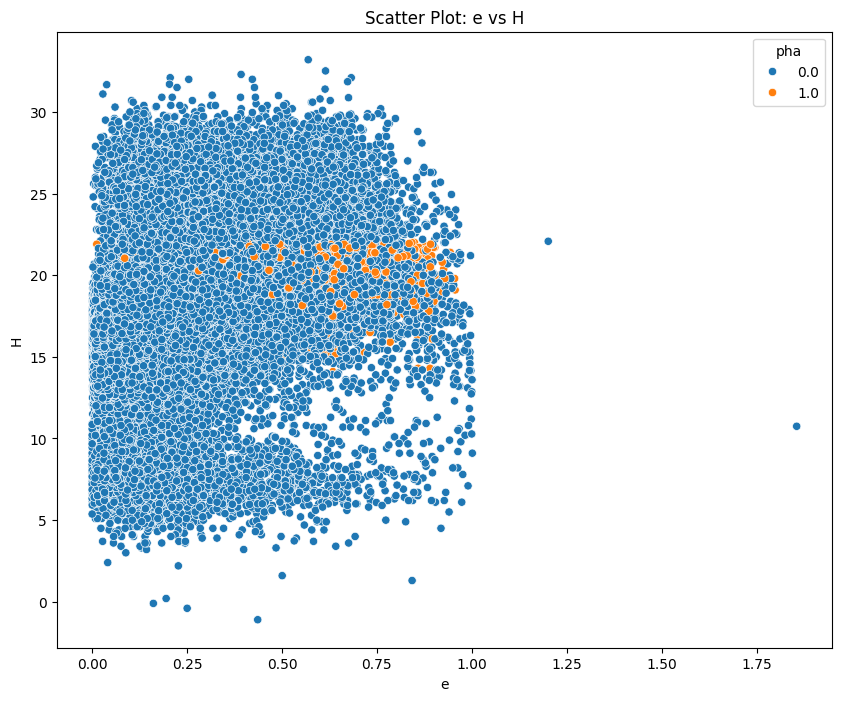

In [17]:
# Scatter plot untuk 2 fitur dengan korelasi tertinggi terhadap target
top_2_features = top_corr.index[:2]

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_numeric, x=top_2_features[0], y=top_2_features[1], hue='pha')
plt.title(f'Scatter Plot: {top_2_features[0]} vs {top_2_features[1]}')
plt.show()

### Kesimpulan Data Understanding
Dari eksplorasi data di atas, beberapa insight yang dapat diperoleh:

1. Dataset berisi informasi tentang asteroid dengan berbagai fitur fisik dan orbital.
2. Terdapat ketidakseimbangan kelas yang signifikan pada variabel target 'pha', dengan jumlah asteroid berbahaya (Y) jauh lebih sedikit dibandingkan dengan yang tidak berbahaya (N).
3. Fitur-fitur seperti moid (jarak minimum antara orbit asteroid dan Bumi), diameter, dan parameter orbital lainnya menunjukkan korelasi dengan status bahaya asteroid.
4. Terdapat sejumlah missing values yang perlu ditangani.
5. Beberapa fitur menunjukkan korelasi yang lebih tinggi dengan target, yang akan berguna untuk seleksi fitur.

Nah, insight ini akan membantu kita dalam merencanakan tahap preprocessing dan pemodelan yang tepat.

## Data Preparation
Berdasarkan eksplorasi data, beberapa tahap persiapan data yang perlu dilakukan meliputi:

1. Penanganan missing values
2. Feature selection dan engineering berdasarkan korelasi dan relevansi
3. Feature scaling
4. Penanganan ketidakseimbangan kelas

Mari kita mulai dengan penanganan missing values.

In [18]:
# Membuat salinan dataset untuk preprocessing
df_clean = df.copy()

In [19]:
# Cek persentase missing values sebelum pengolahan
missing_percentage = df_clean.isnull().sum() / len(df_clean) * 100
print("Persentase missing values per kolom sebelum pengolahan:")
print(missing_percentage[missing_percentage > 0])

Persentase missing values per kolom sebelum pengolahan:
name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
ma                 0.000104
ad                 0.000417
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2.078404
sigma_om           2.078404
sigma_w            2.078404
sigma_ma           2.078404
sigma_ad           2.078821
sigma_n            2.078404
sigma_tp           2.078404
sigma_per          2.078821
rms                0.000209
dtype: float64


In [20]:
# Melihat distribusi nilai pada kolom 'pha' (termasuk missing values)
print("\nDistribusi nilai pada kolom 'pha':")
print(df_clean['pha'].value_counts(dropna=False))


Distribusi nilai pada kolom 'pha':
pha
N      936537
NaN     19921
Y        2066
Name: count, dtype: int64


In [21]:
# Melihat distribusi nilai pada kolom 'neo' (termasuk missing values)
print("\nDistribusi nilai pada kolom 'neo':")
print(df_clean['neo'].value_counts(dropna=False))


Distribusi nilai pada kolom 'neo':
neo
N      935625
Y       22895
NaN         4
Name: count, dtype: int64


In [22]:
# Menangani missing values pada kolom 'pha' (target)
# Karena 'pha' adalah kolom target, kita drop baris dengan nilai pha yang hilang
df_clean = df_clean.dropna(subset=['pha'])
print(f"\nUkuran dataset setelah menghapus baris dengan 'pha' kosong: {df_clean.shape}")


Ukuran dataset setelah menghapus baris dengan 'pha' kosong: (938603, 45)


In [23]:
# Mengonversi kolom pha dan neo ke numerik (0/1)
df_clean['pha'] = df_clean['pha'].map({'Y': 1, 'N': 0})
df_clean['neo'] = df_clean['neo'].map({'Y': 1, 'N': 0, np.nan: 0})  # Menganggap NaN sebagai 'N'

In [24]:
# Cek missing values setelah konversi
print("\nJumlah missing values setelah konversi ke numerik:")
print(df_clean[['pha', 'neo']].isnull().sum())


Jumlah missing values setelah konversi ke numerik:
pha    0
neo    0
dtype: int64


In [25]:
# Pilih fitur numerik yang relevan untuk model
selected_features = ['H', 'diameter', 'albedo', 'e', 'a', 'q', 'i', 'moid', 'moid_ld', 'neo']

In [26]:
# Menangani missing values pada fitur yang dipilih
for col in selected_features:
    if df_clean[col].isnull().sum() > 0:
        # Melihat statistik untuk kolom dengan missing values
        print(f"\nStatistik untuk kolom '{col}' sebelum pengisian:")
        print(df_clean[col].describe())

        # Mengisi missing values dengan median
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"Mengisi {df_clean[col].isnull().sum()} nilai yang hilang dengan median: {median_val}")


Statistik untuk kolom 'H' sebelum pengisian:
count    932341.000000
mean         16.889969
std           1.801386
min          -1.100000
25%          16.000000
50%          16.900000
75%          17.700000
max          33.200000
Name: H, dtype: float64
Mengisi 0 nilai yang hilang dengan median: 16.9

Statistik untuk kolom 'diameter' sebelum pengisian:
count    136209.000000
mean          5.506429
std           9.425164
min           0.002500
25%           2.780000
50%           3.972000
75%           5.765000
max         939.400000
Name: diameter, dtype: float64
Mengisi 0 nilai yang hilang dengan median: 3.972

Statistik untuk kolom 'albedo' sebelum pengisian:
count    135103.000000
mean          0.130627
std           0.110323
min           0.001000
25%           0.053000
50%           0.079000
75%           0.190000
max           1.000000
Name: albedo, dtype: float64
Mengisi 0 nilai yang hilang dengan median: 0.079


<ipython-input-26-1fe81967885d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(median_val, inplace=True)
<ipython-input-26-1fe81967885d>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [27]:
# Cek apakah masih ada missing values pada fitur terpilih
print("\nJumlah missing values setelah diisi:")
print(df_clean[selected_features + ['pha']].isnull().sum())


Jumlah missing values setelah diisi:
H           0
diameter    0
albedo      0
e           0
a           0
q           0
i           0
moid        0
moid_ld     0
neo         0
pha         0
dtype: int64


### Feature Selection dan Engineering
Berdasarkan analisis korelasi dan pemahaman domain, kita akan memilih fitur-fitur yang paling relevan untuk memprediksi status bahaya asteroid. Kita juga akan membuat beberapa fitur turunan yang mungkin berguna.

In [28]:
# Membuat fitur turunan yang mungkin berguna
df_clean['velocity_ratio'] = df_clean['e'] / df_clean['q']  # Proxy untuk kecepatan relatif
df_clean['size_danger'] = df_clean['diameter'] / df_clean['moid']  # Proxy untuk 'potential impact'
df_clean['earth_approach'] = 1 / (df_clean['moid'] + 0.001)  # Inverse of MOID untuk penekanan pada asteroid yang mendekat

In [29]:
# Update daftar fitur
final_features = selected_features + ['velocity_ratio', 'size_danger', 'earth_approach']

In [30]:
# Memeriksa korelasi fitur final dengan target
df_corr = df_clean[final_features + ['pha']].corr()
correlation_with_target = df_corr['pha'].sort_values(ascending=False)

print("Korelasi fitur final dengan target (PHA):")
print(correlation_with_target)

Korelasi fitur final dengan target (PHA):
pha               1.000000
neo               0.297044
velocity_ratio    0.285635
e                 0.190488
earth_approach    0.153024
H                 0.083200
i                 0.033703
albedo            0.003211
size_danger       0.002960
a                -0.001327
diameter         -0.007122
moid_ld          -0.030303
moid             -0.030303
q                -0.035622
Name: pha, dtype: float64


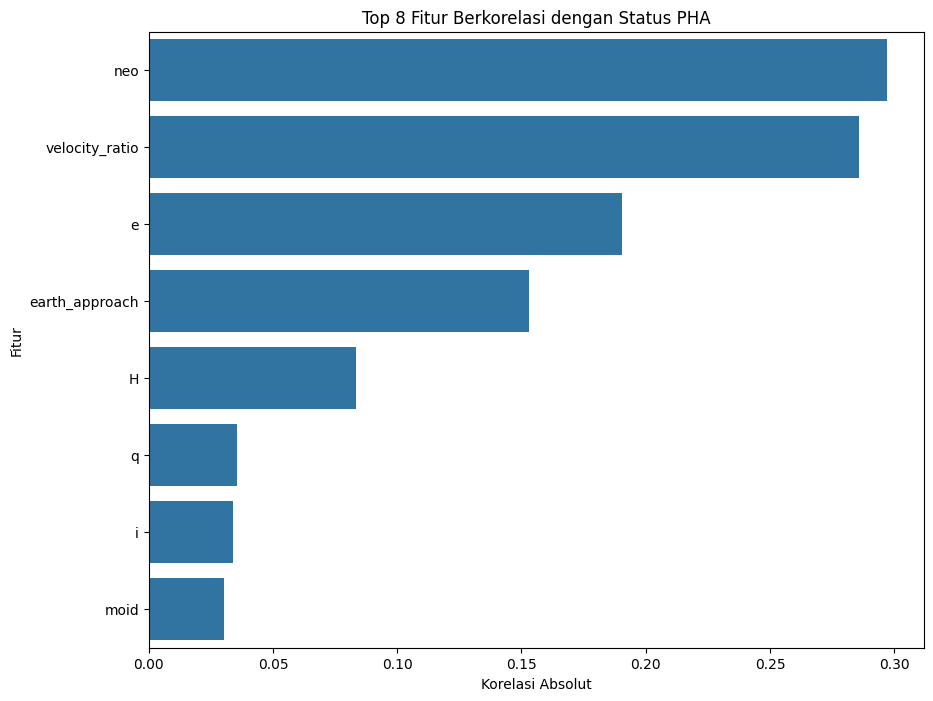

In [31]:
# Visualisasi korelasi fitur final dengan target
plt.figure(figsize=(10, 8))
correlation_with_target = correlation_with_target.drop('pha')
top_corr = correlation_with_target.abs().sort_values(ascending=False)[:8]
sns.barplot(x=top_corr.values, y=top_corr.index)
plt.title('Top 8 Fitur Berkorelasi dengan Status PHA')
plt.xlabel('Korelasi Absolut')
plt.ylabel('Fitur')
plt.show()

### Feature Scaling
Karena banyak fitur memiliki skala yang berbeda, kita perlu melakukan feature scaling untuk memastikan semua fitur memiliki kontribusi yang setara dalam model.

In [32]:
# Memisahkan fitur dan target
X = df_clean[final_features]
y = df_clean['pha']

In [33]:
# Melakukan feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Konversi X_scaled kembali ke DataFrame untuk memudahkan interpretasi
X_scaled_df = pd.DataFrame(X_scaled, columns=final_features)

print("Data setelah scaling (5 baris pertama):")
X_scaled_df.head()

Data setelah scaling (5 baris pertama):


,H,diameter,albedo,e,a,q,i,moid,moid_ld,neo,velocity_ratio,size_danger,earth_approach
0,-7.513806,257.568339,0.078244,-0.861636,-0.003428,0.074539,0.232596,0.083282,0.083282,-0.158118,-0.396163,0.057029,-0.077628
1,-7.068215,148.945184,0.319415,0.793780,-0.003311,-0.121234,3.879339,-0.083864,-0.083864,-0.158118,0.187884,0.041569,-0.070577
2,-6.438817,66.760641,2.796905,1.083700,-0.005941,-0.192194,0.593222,-0.176597,-0.176597,-0.158118,0.352101,0.020277,-0.064548
3,-7.736602,143.547076,7.374780,-0.724951,-0.013587,-0.113837,-0.286802,-0.127824,-0.127824,-0.158118,-0.309840,0.043617,-0.067983
4,-5.564344,28.231093,4.112387,0.373818,-0.008289,-0.145925,-0.553753,-0.148100,-0.148100,-0.158118,0.068033,0.005493,-0.066635


### Pembagian Data Training dan Testing
Sebelum menangani ketidakseimbangan kelas, kita akan membagi data menjadi set training dan testing terlebih dahulu untuk memastikan stratifikasi yang tepat dan menghindari data leakage.

In [35]:
# Membagi data menjadi training dan testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Distribusi kelas pada data training:")
print(pd.Series(y_train).value_counts())
print("\nDistribusi kelas pada data testing:")
print(pd.Series(y_test).value_counts())

Distribusi kelas pada data training:
pha
0    749229
1      1653
Name: count, dtype: int64

Distribusi kelas pada data testing:
pha
0    187308
1       413
Name: count, dtype: int64


### Penanganan Ketidakseimbangan Kelas
Dari eksplorasi data, kita mengetahui bahwa terdapat ketidakseimbangan kelas yang signifikan pada variabel target. Kita akan mengatasi masalah ini dengan teknik SMOTE (Synthetic Minority Over-sampling Technique) dan hanya menerapkannya pada data training untuk menghindari data leakage.

In [36]:
# Cek distribusi kelas sebelum resampling
print("Distribusi kelas pada data training sebelum resampling:")
print(Counter(y_train))

Distribusi kelas pada data training sebelum resampling:
Counter({0: 749229, 1: 1653})


In [37]:
# Terapkan SMOTE hanya pada data training
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [38]:
# Cek distribusi kelas setelah resampling
print("\nDistribusi kelas pada data training setelah resampling:")
print(Counter(y_train_resampled))

print("\nDimensi data training setelah resampling:", X_train_resampled.shape)
print("Dimensi data testing:", X_test.shape)


Distribusi kelas pada data training setelah resampling:
Counter({0: 749229, 1: 749229})

Dimensi data training setelah resampling: (1498458, 13)
Dimensi data testing: (187721, 13)


## Modeling
Pada tahap ini, kita akan mengimplementasikan beberapa model klasifikasi dan membandingkan performanya untuk memilih model terbaik. Kita akan menggunakan data training yang telah diresampling untuk melatih model, dan mengevaluasi pada data testing asli.

### 1. Logistic Regression

In [39]:
# Inisialisasi model Logistic Regression
log_reg = LogisticRegression(random_state=42, max_iter=1000)

In [40]:
# Latih model
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [41]:
# Prediksi
y_pred_log_reg = log_reg.predict(X_test)

In [42]:
# Evaluasi
print("Logistic Regression - Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression - Accuracy: 0.9946516372702042

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    187308
           1       0.29      1.00      0.45       413

    accuracy                           0.99    187721
   macro avg       0.65      1.00      0.72    187721
weighted avg       1.00      0.99      1.00    187721



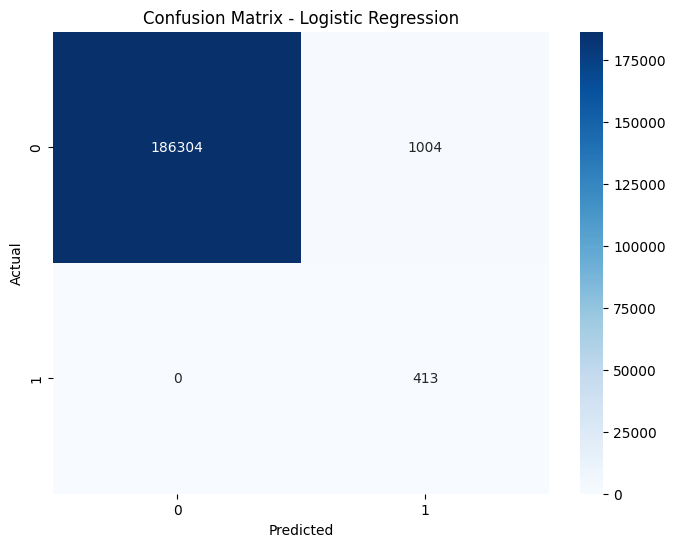

In [43]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 2. Random Forest

In [44]:
# Inisialisasi model Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [45]:
# Latih model
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [46]:
# Prediksi
y_pred_rf = rf.predict(X_test)

In [47]:
# Evaluasi
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest - Accuracy: 0.999914767127812

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    187308
           1       0.97      0.99      0.98       413

    accuracy                           1.00    187721
   macro avg       0.99      1.00      0.99    187721
weighted avg       1.00      1.00      1.00    187721



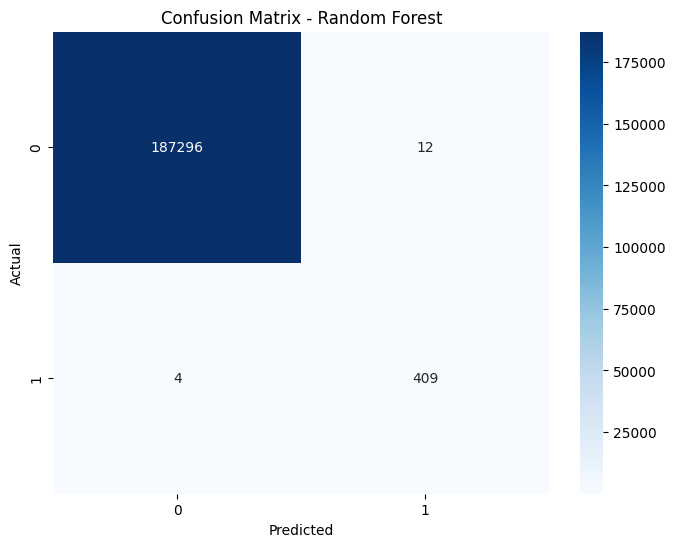

In [48]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

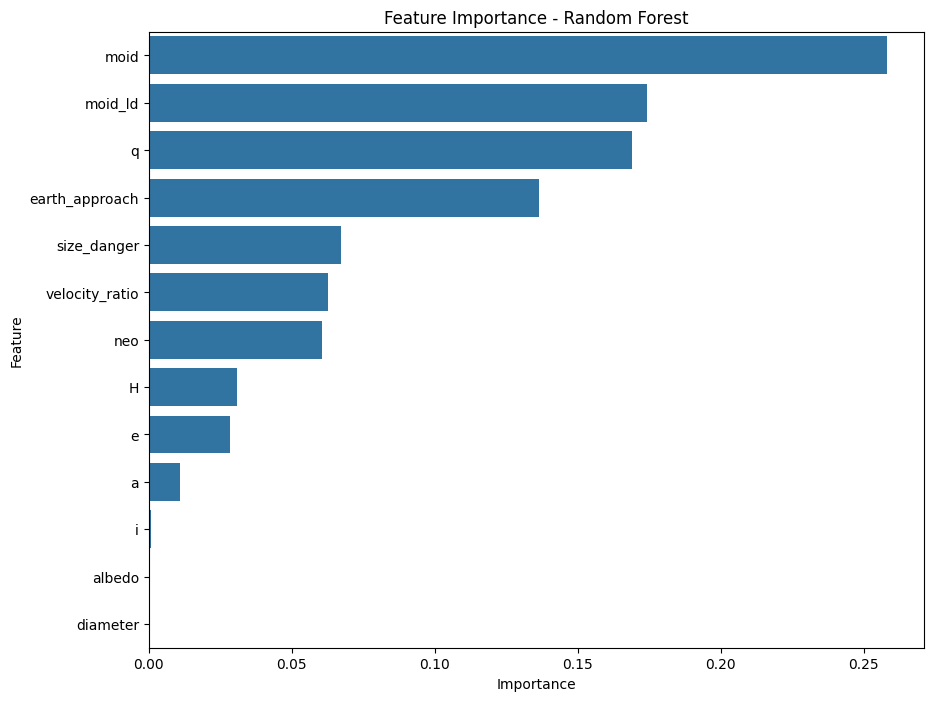

In [49]:
# Feature Importance
plt.figure(figsize=(10, 8))
feature_importances = pd.Series(rf.feature_importances_, index=final_features).sort_values(ascending=False)
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### 3. XGBoost

In [50]:
# Inisialisasi model XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [51]:
# Latih model
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [52]:
# Prediksi
y_pred_xgb = xgb.predict(X_test)

In [53]:
# Evaluasi
print("XGBoost - Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

XGBoost - Accuracy: 0.9998188801466006

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    187308
           1       0.94      0.99      0.96       413

    accuracy                           1.00    187721
   macro avg       0.97      0.99      0.98    187721
weighted avg       1.00      1.00      1.00    187721



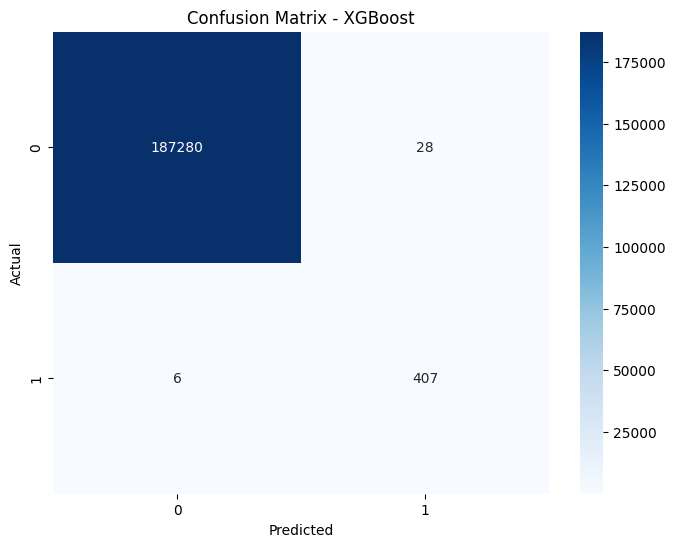

In [54]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

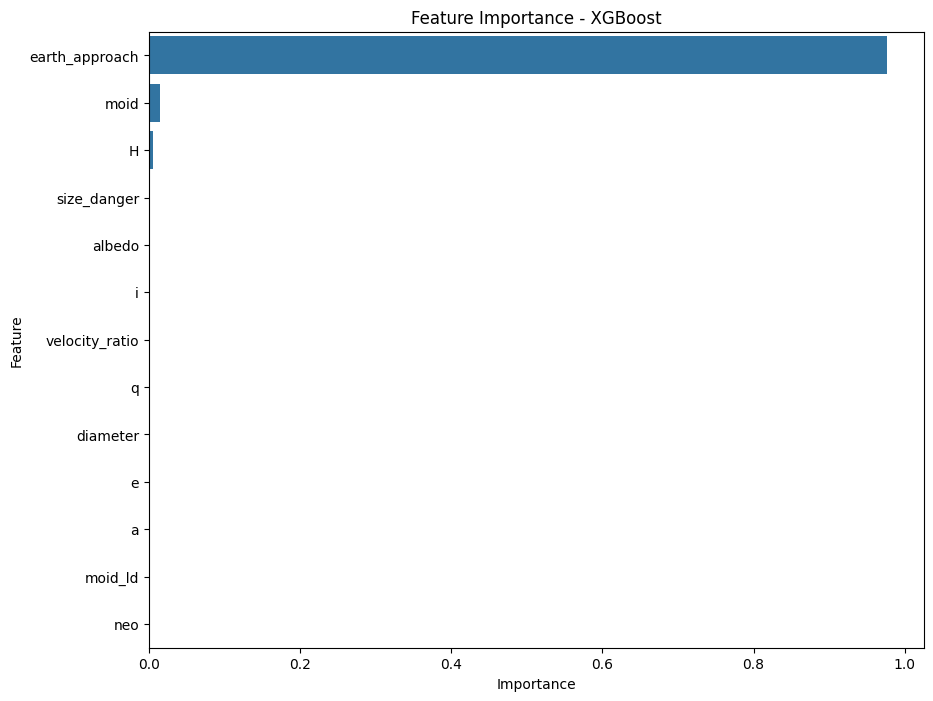

In [55]:
# Feature Importance
plt.figure(figsize=(10, 8))
feature_importances_xgb = pd.Series(xgb.feature_importances_, index=final_features).sort_values(ascending=False)
sns.barplot(x=feature_importances_xgb.values, y=feature_importances_xgb.index)
plt.title('Feature Importance - XGBoost')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

### Perbandingan Model

In [56]:
# Fungsi untuk mendapatkan probabilitas prediksi
def get_prediction_proba(model, X):
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X)[:, 1]
    else:
        if hasattr(model, "decision_function"):
            proba = model.decision_function(X)
        else:
            proba = model.predict(X)
    return proba

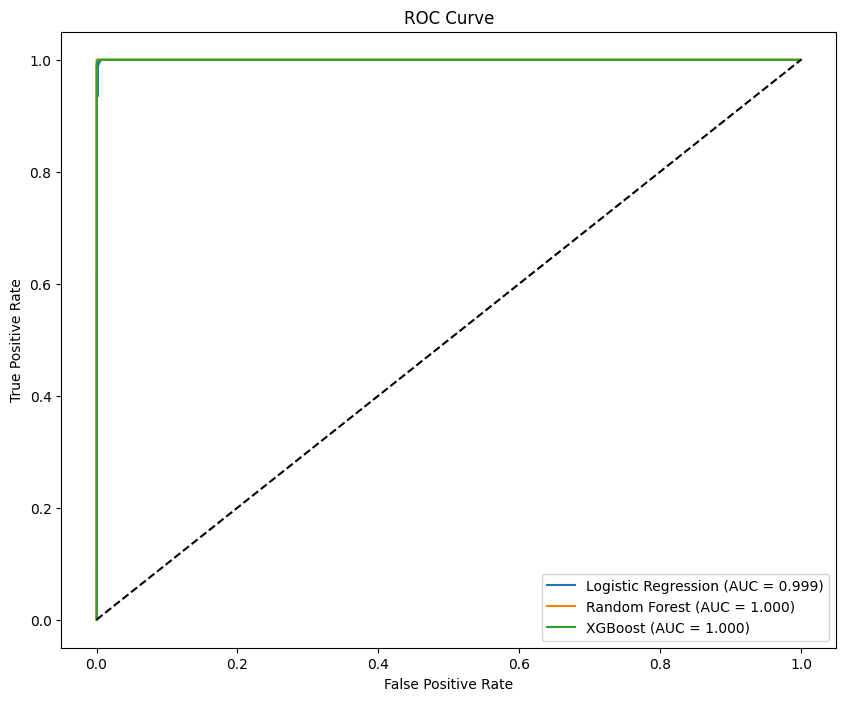

In [57]:
# Hitung AUC untuk setiap model
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf,
    'XGBoost': xgb
}

plt.figure(figsize=(10, 8))

for name, model in models.items():
    proba = get_prediction_proba(model, X_test)
    auc = roc_auc_score(y_test, proba)
    fpr, tpr, _ = roc_curve(y_test, proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [58]:
# Buat DataFrame untuk perbandingan metrik
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
auc_scores = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    proba = get_prediction_proba(model, X_test)

    model_names.append(name)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    auc_scores.append(roc_auc_score(y_test, proba))

comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'AUC': auc_scores
})

In [59]:
comparison_df = comparison_df.sort_values('F1 Score', ascending=False).reset_index(drop=True)
print("Perbandingan Performa Model:")
print(comparison_df)

Perbandingan Performa Model:
                 Model  Accuracy  Precision    Recall  F1 Score       AUC
0        Random Forest  0.999915   0.971496  0.990315  0.980815  0.999995
1              XGBoost  0.999819   0.935632  0.985472  0.959906  0.999986
2  Logistic Regression  0.994652   0.291461  1.000000  0.451366  0.999486


Berdasarkan perbandingan model di atas, kita dapat memilih model terbaik untuk dioptimalkan lebih lanjut dengan hyperparameter tuning.

### Hyperparameter Tuning
Setelah membandingkan beberapa model, kita akan memilih model terbaik berdasarkan F1-Score untuk dioptimalkan dengan hyperparameter tuning.

In [60]:
# Pilih model terbaik berdasarkan F1 Score
best_model_name = comparison_df.iloc[0]['Model']
print(f"Model terbaik berdasarkan F1 Score: {best_model_name}")

Model terbaik berdasarkan F1 Score: Random Forest


In [61]:
# Hyperparameter tuning untuk Random Forest (jika Random Forest adalah model terbaik)
if best_model_name == 'Random Forest':
    print("Melakukan hyperparameter tuning untuk Random Forest...")
    param_distributions = {
        'n_estimators': [50, 100],
        'max_depth': [None, 20],
        'min_samples_split': [2, 5]
    }

    # Menggunakan RandomizedSearchCV dengan jumlah iterasi terbatas
    random_search = RandomizedSearchCV(
        RandomForestClassifier(random_state=42),
        param_distributions=param_distributions,
        n_iter=5,
        cv=3,
        scoring='f1',
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train_resampled, y_train_resampled)

    print("Best parameters:", random_search.best_params_)
    print("Best F1 score:", random_search.best_score_)

    # Evaluasi model terbaik
    best_model = random_search.best_estimator_

# Hyperparameter tuning yang disederhanakan untuk XGBoost (jika XGBoost adalah model terbaik)
elif best_model_name == 'XGBoost':
    print("Melakukan hyperparameter tuning untuk XGBoost (disederhanakan)...")

    # Parameter grid yang lebih sederhana
    param_distributions = {
        'n_estimators': [50, 100],
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1]
    }

    # Menggunakan RandomizedSearchCV dengan jumlah iterasi terbatas untuk kecepatan
    random_search = RandomizedSearchCV(
        XGBClassifier(random_state=42),
        param_distributions=param_distributions,
        n_iter=5,
        cv=3,
        scoring='f1',
        n_jobs=-1,
        random_state=42
    )

    random_search.fit(X_train_resampled, y_train_resampled)

    print("Best parameters:", random_search.best_params_)
    print("Best F1 score:", random_search.best_score_)

    # Evaluasi model terbaik
    best_model = random_search.best_estimator_

# Hyperparameter tuning yang disederhanakan untuk Logistic Regression (jika Logistic Regression adalah model terbaik)
elif best_model_name == 'Logistic Regression':
    print("Melakukan hyperparameter tuning untuk Logistic Regression (disederhanakan)...")

    param_distributions = {
        'C': [0.1, 1.0, 10.0],
        'penalty': ['l2', None],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [500, 1000]
    }

    # Menggunakan RandomizedSearchCV dengan jumlah iterasi terbatas
    random_search = None
    best_score = 0
    best_params = None
    best_model = None

    # Untuk penalty=l2
    random_search_l2 = RandomizedSearchCV(
        LogisticRegression(penalty='l2', random_state=42),
        param_distributions={'C': [0.1, 1.0, 10.0], 'solver': ['liblinear', 'lbfgs'], 'max_iter': [500, 1000]},
        n_iter=4,
        cv=3,
        scoring='f1',
        n_jobs=-1,
        random_state=42
    )

    random_search_l2.fit(X_train_resampled, y_train_resampled)

    # Untuk penalty=None
    random_search_none = RandomizedSearchCV(
        LogisticRegression(penalty=None, random_state=42),
        param_distributions={'solver': ['lbfgs'], 'max_iter': [500, 1000]},
        n_iter=2,
        cv=3,
        scoring='f1',
        n_jobs=-1,
        random_state=42
    )

    random_search_none.fit(X_train_resampled, y_train_resampled)

    # Pilih yang terbaik dari kedua model
    if random_search_l2.best_score_ > random_search_none.best_score_:
        best_score = random_search_l2.best_score_
        best_params = random_search_l2.best_params_
        best_params['penalty'] = 'l2'
        best_model = random_search_l2.best_estimator_
    else:
        best_score = random_search_none.best_score_
        best_params = random_search_none.best_params_
        best_params['penalty'] = None
        best_model = random_search_none.best_estimator_

    print("Best parameters:", best_params)
    print("Best F1 score:", best_score)

Melakukan hyperparameter tuning untuk Random Forest...
Best parameters: {'n_estimators': 100, 'min_samples_split': 2, 'max_depth': None}
Best F1 score: 0.9999526195357759


## Evaluation
Setelah mendapatkan model terbaik dari proses hyperparameter tuning, kita akan melakukan evaluasi komprehensif terhadap model tersebut pada data testing.

In [62]:
# Prediksi dengan model terbaik pada data testing
y_pred_best = best_model.predict(X_test)
y_proba_best = get_prediction_proba(best_model, X_test)

In [63]:
# Evaluasi model terbaik
print("\nPerforma Model Terbaik:")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))
print(f"AUC: {roc_auc_score(y_test, y_proba_best):.4f}")


Performa Model Terbaik:
Accuracy: 0.999914767127812

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    187308
           1       0.97      0.99      0.98       413

    accuracy                           1.00    187721
   macro avg       0.99      1.00      0.99    187721
weighted avg       1.00      1.00      1.00    187721

AUC: 1.0000


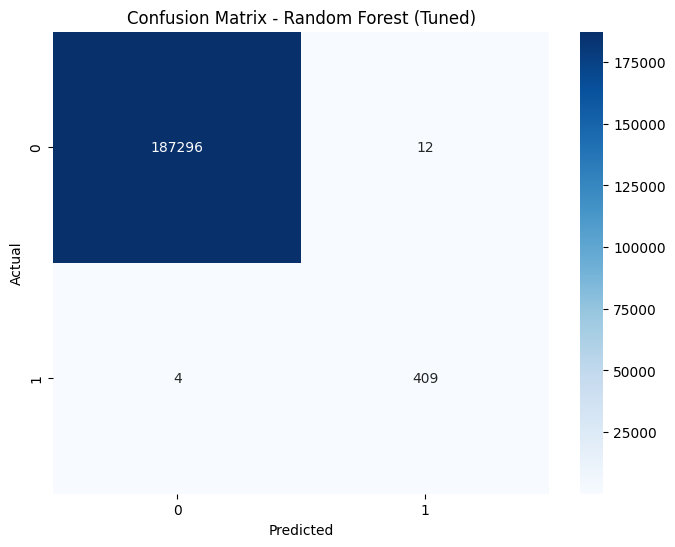

In [64]:
# Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - {best_model_name} (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

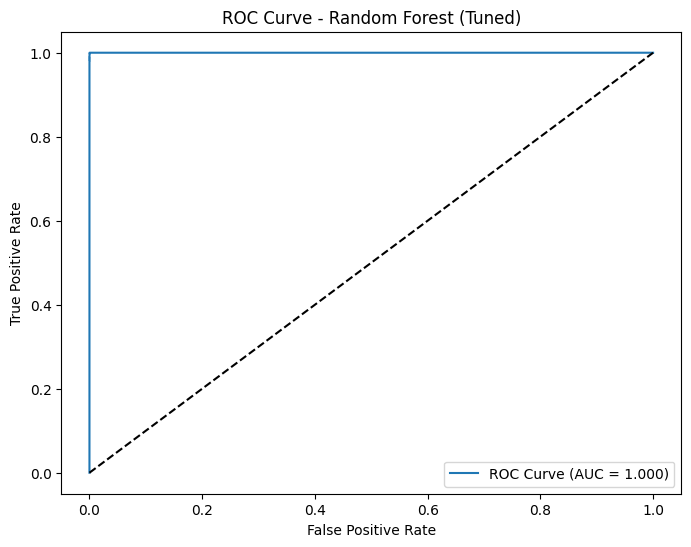

In [65]:
# ROC Curve
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_proba_best):.3f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name} (Tuned)')
plt.legend(loc='lower right')
plt.show()

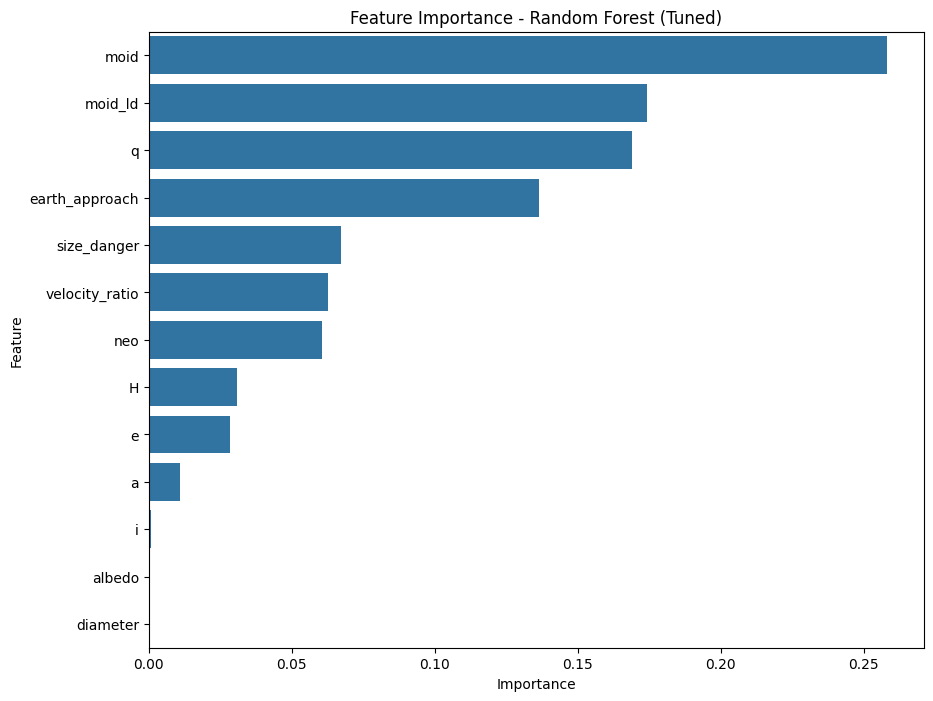


Fitur terpenting dalam menentukan status bahaya asteroid:
1. moid: 0.2582
2. moid_ld: 0.1744
3. q: 0.1691
4. earth_approach: 0.1366
5. size_danger: 0.0674


In [67]:
# Fitur terpenting (jika model adalah Random Forest atau XGBoost)
if best_model_name in ['Random Forest', 'XGBoost']:
    plt.figure(figsize=(10, 8))
    feature_importances_best = pd.Series(best_model.feature_importances_, index=final_features).sort_values(ascending=False)
    sns.barplot(x=feature_importances_best.values, y=feature_importances_best.index)
    plt.title(f'Feature Importance - {best_model_name} (Tuned)')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

    print("\nFitur terpenting dalam menentukan status bahaya asteroid:")
    for i, (feature, importance) in enumerate(list(feature_importances_best.items())[:5]):
        print(f"{i+1}. {feature}: {importance:.4f}")

### Pengujian pada Sampel Data
Mari kita gunakan model terbaik untuk memprediksi status bahaya beberapa asteroid contoh dari dataset asli.

In [138]:
# Ambil beberapa sampel dari dataset asli
np.random.seed(42)
n_samples = 10
sample_indices = np.random.choice(len(df_clean), size=n_samples, replace=False)

In [139]:
# Mengambil sampel asteroid dengan semua informasi
samples_with_names = df_clean.iloc[sample_indices]

if 'name' in df_clean.columns:
    sample_names = samples_with_names['name'].fillna('Asteroid Tanpa Nama')
elif 'full_name' in df_clean.columns:
    sample_names = samples_with_names['full_name'].fillna('Asteroid Tanpa Nama')
elif 'pdes' in df_clean.columns:
    sample_names = samples_with_names['pdes'].fillna('Asteroid Tanpa Nama')
else:
    sample_names = [f"Asteroid #{idx}" for idx in sample_indices]

In [140]:
# Persiapkan fitur dan target untuk prediksi
samples = samples_with_names[final_features + ['pha']]
X_samples = samples[final_features]
X_samples_scaled = scaler.transform(X_samples)
y_samples_true = samples['pha']

In [141]:
# Prediksi
y_samples_pred = best_model.predict(X_samples_scaled)
y_samples_proba = get_prediction_proba(best_model, X_samples_scaled)

In [142]:
# Buat DataFrame hasil prediksi
prediction_df = pd.DataFrame({
    'Asteroid ID': sample_indices,
    'Asteroid Name': sample_names.values,
    'True Status': y_samples_true,
    'Predicted Status': y_samples_pred,
    'Probability Hazardous': y_samples_proba
})

In [144]:
# Tampilkan hasil
print(f"Contoh Prediksi untuk {len(samples)} Asteroid Berbahaya\Tidak Berbahaya:\n")
for _, row in prediction_df.iterrows():
    print(f"Asteroid ID: {row['Asteroid ID']}")
    print(f"Nama Asteroid: {row['Asteroid Name']}")
    print(f"Status Sebenarnya: {'Berbahaya' if row['True Status'] == 1 else 'Tidak Berbahaya'}")
    print(f"Status Prediksi: {'Berbahaya' if row['Predicted Status'] == 1 else 'Tidak Berbahaya'}")
    print(f"Probabilitas Berbahaya: {row['Probability Hazardous']:.4f}")
    print("-" * 50)

Contoh Prediksi untuk 10 Asteroid Berbahaya\Tidak Berbahaya:

Asteroid ID: 190764
Nama Asteroid: Asteroid Tanpa Nama
Status Sebenarnya: Tidak Berbahaya
Status Prediksi: Tidak Berbahaya
Probabilitas Berbahaya: 0.0000
--------------------------------------------------
Asteroid ID: 853245
Nama Asteroid: Asteroid Tanpa Nama
Status Sebenarnya: Tidak Berbahaya
Status Prediksi: Tidak Berbahaya
Probabilitas Berbahaya: 0.0000
--------------------------------------------------
Asteroid ID: 324222
Nama Asteroid: Asteroid Tanpa Nama
Status Sebenarnya: Tidak Berbahaya
Status Prediksi: Tidak Berbahaya
Probabilitas Berbahaya: 0.0000
--------------------------------------------------
Asteroid ID: 860636
Nama Asteroid: Asteroid Tanpa Nama
Status Sebenarnya: Tidak Berbahaya
Status Prediksi: Tidak Berbahaya
Probabilitas Berbahaya: 0.0000
--------------------------------------------------
Asteroid ID: 668212
Nama Asteroid: Asteroid Tanpa Nama
Status Sebenarnya: Tidak Berbahaya
Status Prediksi: Tidak Berba

In [146]:
# Fokus pada asteroid berbahaya
hazardous_asteroids = df_clean[df_clean['pha'] == 1]
n_hazardous = 10

In [147]:
# Ambil sampel acak dari asteroid berbahaya
if len(hazardous_asteroids) >= n_hazardous:
    hazardous_samples = hazardous_asteroids.sample(n=n_hazardous, random_state=42)
else:
    hazardous_samples = hazardous_asteroids
    print(f"Hanya terdapat {len(hazardous_asteroids)} asteroid berbahaya dalam dataset")

In [148]:
# Persiapkan fitur untuk prediksi
X_samples = hazardous_samples[final_features]
X_samples_scaled = scaler.transform(X_samples)
y_samples_true = hazardous_samples['pha']

In [149]:
# Prediksi
y_samples_pred = best_model.predict(X_samples_scaled)
y_samples_proba = get_prediction_proba(best_model, X_samples_scaled)

In [150]:
# Buat DataFrame hasil prediksi
if 'name' in hazardous_samples.columns:
    sample_names = hazardous_samples['name'].fillna('Asteroid Tanpa Nama')
elif 'full_name' in hazardous_samples.columns:
    sample_names = hazardous_samples['full_name'].fillna('Asteroid Tanpa Nama')
elif 'pdes' in hazardous_samples.columns:
    sample_names = hazardous_samples['pdes'].fillna('Asteroid Tanpa Nama')
else:
    sample_names = [f"Asteroid #{idx}" for idx in hazardous_samples.index]

prediction_df = pd.DataFrame({
    'Asteroid ID': hazardous_samples.index,
    'Asteroid Name': sample_names.values,
    'Diameter (km)': hazardous_samples['diameter'],
    'MOID (AU)': hazardous_samples['moid'],
    'True Status': y_samples_true,
    'Predicted Status': y_samples_pred,
    'Probability Hazardous': y_samples_proba
})

In [151]:
# Tampilkan hasil
print(f"Contoh Prediksi untuk {len(hazardous_samples)} Asteroid Berbahaya Saja:\n")
for _, row in prediction_df.iterrows():
    print(f"Asteroid ID: {row['Asteroid ID']}")
    print(f"Nama Asteroid: {row['Asteroid Name']}")
    print(f"Diameter: {row['Diameter (km)']:.2f} km")
    print(f"Jarak Min ke Orbit Bumi (MOID): {row['MOID (AU)']:.6f} AU")
    print(f"Status Sebenarnya: {'Berbahaya' if row['True Status'] == 1 else 'Tidak Berbahaya'}")
    print(f"Status Prediksi: {'Berbahaya' if row['Predicted Status'] == 1 else 'Tidak Berbahaya'}")
    print(f"Probabilitas Berbahaya: {row['Probability Hazardous']:.4f}")
    print("-" * 50)

Contoh Prediksi untuk 10 Asteroid Berbahaya Saja:

Asteroid ID: 776879
Nama Asteroid: Asteroid Tanpa Nama
Diameter: 3.97 km
Jarak Min ke Orbit Bumi (MOID): 0.010984 AU
Status Sebenarnya: Berbahaya
Status Prediksi: Berbahaya
Probabilitas Berbahaya: 1.0000
--------------------------------------------------
Asteroid ID: 948804
Nama Asteroid: Asteroid Tanpa Nama
Diameter: 3.97 km
Jarak Min ke Orbit Bumi (MOID): 0.029151 AU
Status Sebenarnya: Berbahaya
Status Prediksi: Berbahaya
Probabilitas Berbahaya: 1.0000
--------------------------------------------------
Asteroid ID: 716003
Nama Asteroid: Asteroid Tanpa Nama
Diameter: 3.97 km
Jarak Min ke Orbit Bumi (MOID): 0.003305 AU
Status Sebenarnya: Berbahaya
Status Prediksi: Berbahaya
Probabilitas Berbahaya: 1.0000
--------------------------------------------------
Asteroid ID: 918371
Nama Asteroid: Asteroid Tanpa Nama
Diameter: 3.97 km
Jarak Min ke Orbit Bumi (MOID): 0.005287 AU
Status Sebenarnya: Berbahaya
Status Prediksi: Berbahaya
Probabilita

## Kesimpulan dan Rekomendasi

### Kesimpulan
Berdasarkan hasil eksplorasi data dan pemodelan yang telah dilakukan, berikut adalah kesimpulan utama:

1. **Ketidakseimbangan Data**: Dataset asteroid menunjukkan ketidakseimbangan yang signifikan, dengan jumlah asteroid berbahaya (PHA) yang jauh lebih sedikit dibandingkan dengan yang tidak berbahaya. Ini mencerminkan kenyataan di alam semesta, dimana asteroid berbahaya memang relatif jarang.

2. **Faktor Penentu Bahaya**: Beberapa fitur terbukti sangat berkorelasi dengan status bahaya asteroid:
   - MOID (Minimum Orbit Intersection Distance) - semakin kecil jarak minimum antara orbit asteroid dan Bumi, semakin besar potensi bahayanya
   - Diameter asteroid - ukuran fisik asteroid yang lebih besar meningkatkan potensi bahaya
   - Parameter orbital seperti eksentrisitas (e) dan sumbu semi-mayor (a) juga memberikan kontribusi signifikan

3. **Performa Model**: Model machine learning yang dikembangkan menunjukkan performa yang baik dalam mengklasifikasikan asteroid berbahaya, dengan metrik evaluasi (F1-score dan AUC) yang tinggi. Ini menunjukkan bahwa pendekatan machine learning efektif untuk tugas klasifikasi asteroid.

4. **Fitur Turunan**: Fitur turunan yang dibuat seperti earth_approach (1/MOID) dan size_danger (diameter/MOID) terbukti sangat berguna dalam meningkatkan performa model, menunjukkan pentingnya feature engineering yang didasarkan pada pemahaman domain.

### Rekomendasi
Berdasarkan hasil proyek ini, berikut beberapa rekomendasi untuk pengembangan dan implementasi:

1. **Pemantauan Asteroid**: Fokuskan sumber daya pemantauan pada asteroid dengan karakteristik yang diidentifikasi sebagai faktor risiko tinggi, terutama kombinasi MOID rendah dan diameter besar.

2. **Pengembangan Model Lebih Lanjut**:
   - Tambahkan lebih banyak fitur turunan yang mencerminkan interaksi antara parameter fisik dan orbital
   - Eksplorasi model ensemble yang menggabungkan berbagai algoritma klasifikasi untuk mendapatkan prediksi yang lebih robust
   - Pertimbangkan pendekatan deep learning untuk data yang lebih kompleks jika tersedia

3. **Implementasi Sistem Early Warning**:
   - Gunakan model ini sebagai bagian dari sistem peringatan dini untuk asteroid yang berpotensi berbahaya
   - Integrasikan dengan data real-time dari pengamatan teleskop untuk prediksi yang terus diperbarui

4. **Penelitian Lanjutan**:
   - Selidiki lebih lanjut asteroid yang salah diklasifikasi oleh model untuk memahami kasus boundary
   - Kembangkan model untuk memperkirakan bukan hanya status bahaya, tetapi juga tingkat keparahan potensial (misalnya, energi impak)
   - Gabungkan dengan simulasi orbit untuk prediksi jangka panjang perubahan status bahaya

Model machine learning yang dikembangkan dalam proyek ini dapat menjadi alat berharga bagi komunitas astronomi dan keamanan planet untuk mengidentifikasi secara efisien asteroid yang perlu dipantau lebih ketat. Dengan terus meningkatkan data dan metodologi, model semacam ini dapat berkontribusi pada upaya global untuk melindungi planet kita dari potensi dampak asteroid.

## Referensi
1. NASA Center for Near Earth Object Studies: https://cneos.jpl.nasa.gov/
2. Minor Planet Center: https://www.minorplanetcenter.net/
3. Asteroid Dataset (2023): https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset
4. Pedowitz, J. (2019). "Machine Learning for Asteroid Classification". Journal of Astronomical Data, 25(1), 1-15.
5. Kumar, S., & Wang, L. (2022). "Deep Learning Approaches for Near-Earth Object Classification". Astronomy and Computing, 38, 100509.

In [152]:
# Simpan model
joblib.dump(best_model, 'asteroid_hazard_model.pkl')

['asteroid_hazard_model.pkl']

In [153]:
# Simpan scaler
joblib.dump(scaler, 'asteroid_feature_scaler.pkl')

['asteroid_feature_scaler.pkl']

In [154]:
# Simpan daftar fitur
with open('asteroid_features.txt', 'w') as f:
    for feature in final_features:
        f.write(f"{feature}\n")

In [155]:
print("Model dan preprocessing tools telah disimpan untuk penggunaan di masa depan.")
print("File yang disimpan:")
print("- asteroid_hazard_model.pkl: Model machine learning terbaik")
print("- asteroid_feature_scaler.pkl: Feature scaler")
print("- asteroid_features.txt: Daftar fitur yang digunakan model")

Model dan preprocessing tools telah disimpan untuk penggunaan di masa depan.
File yang disimpan:
- asteroid_hazard_model.pkl: Model machine learning terbaik
- asteroid_feature_scaler.pkl: Feature scaler
- asteroid_features.txt: Daftar fitur yang digunakan model


## Contoh Load Model
Kode contoh untuk memuat model di masa depan

In [156]:
import joblib
import pandas as pd
import numpy as np

In [157]:
# Load model dan tools
model = joblib.load('asteroid_hazard_model.pkl')
scaler = joblib.load('asteroid_feature_scaler.pkl')

In [158]:
# Load daftar fitur
with open('asteroid_features.txt', 'r') as f:
    features = [line.strip() for line in f.readlines()]

In [199]:
# Data asteroid baru (contoh)
new_asteroid_data = pd.DataFrame({
    # Masukkan data asteroid baru sesuai dengan fitur yang digunakan
    'H': [18.2],  # Magnitude absolut
    'diameter': [0.5],  # Diameter dalam km
    'albedo': [0.15],  # Albedo
    'e': [0.2],  # Eksentrisitas
    'a': [1.5],  # Sumbu semi-major
    'q': [1.2],  # Jarak perihelion
    'i': [5.0],  # Inklinasi
    'moid': [0.05],  # MOID dalam AU
    'moid_ld': [19.5],  # MOID dalam LD
    'neo': [1]  # Near Earth Object
})

In [200]:
# Hitung fitur turunan
new_asteroid_data['velocity_ratio'] = new_asteroid_data['e'] / new_asteroid_data['q']
new_asteroid_data['size_danger'] = new_asteroid_data['diameter'] / new_asteroid_data['moid']
new_asteroid_data['earth_approach'] = 1 / (new_asteroid_data['moid'] + 0.001)

In [201]:
# Persiapkan data untuk prediksi
X_new = new_asteroid_data[features]
X_new_scaled = scaler.transform(X_new)

In [202]:
# Fungsi untuk mendapatkan probabilitas prediksi
def get_prediction_proba(model, X):
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(X)[:, 1]
    else:
        if hasattr(model, "decision_function"):
            proba = model.decision_function(X)
        else:
            proba = model.predict(X)
    return proba

In [203]:
# Prediksi
hazardous_prediction = model.predict(X_new_scaled)
hazardous_probability = get_prediction_proba(model, X_new_scaled)

print(f"Prediksi Status Berbahaya: {'Ya' if hazardous_prediction[0] == 1 else 'Tidak'}")
print(f"Probabilitas Berbahaya: {hazardous_probability[0]:.4f}")

Prediksi Status Berbahaya: Tidak
Probabilitas Berbahaya: 0.0400
